### Libraries for dataset manipulation and visulization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
dataset = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Extracted Features\\Formula_Index_with_pH_value.csv')

### Preprocessing on dataset

In [3]:
X = np.array(dataset['Formula_Index'])
Y = np.array(dataset['pH_Value'])
print(X)
print(Y)

[525.  505.  542.  ... 397.  262.5 365. ]
[7.9 7.9 7.9 ... 7.7 7.7 7.7]


In [4]:
X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)
print(X,Y)

[[525. ]
 [505. ]
 [542. ]
 ...
 [397. ]
 [262.5]
 [365. ]] [[7.9]
 [7.9]
 [7.9]
 ...
 [7.7]
 [7.7]
 [7.7]]


### DTR model training

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y)

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

### Prediction 

In [7]:
prediction = regressor.predict([[500]])
print(prediction)

[7.8]


In [8]:
pred = regressor.predict(X_val)
print(pred)

[7.72857143 7.675      8.03333333 7.9        7.9        8.02857143
 7.75714286 7.85       7.8        7.9        7.71       7.8
 7.6        7.8        7.76666667 7.9        7.83333333 7.8
 7.825      7.9        7.9        7.875      7.9        7.71666667
 7.9        7.8        7.92       7.8        8.02857143 7.85
 7.85       7.8        7.9        7.8        7.8        7.7875
 7.8        7.77142857 7.9        7.7        7.63333333 8.02857143
 7.7        7.8        7.84285714 7.73333333 7.85       7.75
 7.9        8.02       7.85       7.875      7.7875     7.9
 8.2        7.95714286 7.84       7.9        8.         7.68571429
 7.95       7.8875     7.73333333 7.675      7.72857143 7.9
 7.8        7.85       7.8        7.725      7.85       7.8
 7.85       7.84       7.7625     7.83333333 7.8        7.8
 7.9        8.2        7.9        8.1        7.8875     7.6
 7.77894737 7.65       7.96       7.86666667 7.775      7.9
 7.96666667 7.7        7.7        7.8        7.7        7.88333333


In [9]:
# mse , mae and r2_score values
mae_value = mean_absolute_error(y_val, pred)
mse_value = mean_squared_error(y_val, pred)
r2_score_value = r2_score(y_val, pred)
# Total error with mse , mae and r2_score
print(f"MSE {mse_value}")
print(f"MAE {mae_value}")
print(f"r2_score {r2_score_value}")

MSE 0.039797424762528864
MAE 0.15529658262196847
r2_score -0.11541969810873187


### Visulization

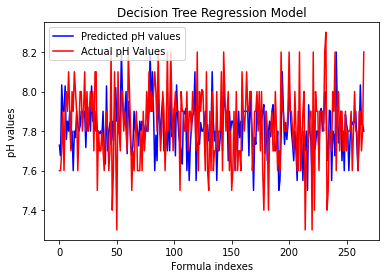

In [10]:
plt.plot(pred,color = 'Blue')
plt.plot(y_val, color = 'red')
plt.title("Decision Tree Regression Model")
plt.legend(['Predicted pH values', 'Actual pH Values'], loc='upper left')
plt.xlabel('Formula indexes')
plt.ylabel('pH values')
plt.savefig("DTRmodelForpHestimationUsingFormula.jpg")